# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# EDA Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from scipy.spatial import ConvexHull

# Data Preprocessing Libraries
!pip install datasist
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from datasist.structdata import detect_outliers
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learing (classification models) Libraries
from platform import python_version
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
def load_dataset():
    df = pd.read_csv("guns_incident.csv")
    print(f"✅ Data loaded! Ukuran: {df.shape}")
    return df

df = load_dataset()
df.head()

✅ Data loaded! Ukuran: (82727, 11)


,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident
0,1,2017,1,06-01-2017,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100.0,Home
1,2,2017,1,19-01-2017,Suicide,Some college,Female,22.0,White,100.0,Street
2,3,2017,1,01-01-2017,Suicide,Bachelors,Male,61.0,White,100.0,Other specified
3,4,2017,2,06-02-2017,Suicide,Bachelors,Male,65.0,White,100.0,Home
4,5,2017,2,09-02-2017,Suicide,High School,Male,32.0,White,100.0,Other specified


In [3]:
# Mengambil 10.000 sampel data secara random
df = df.sample(n=10000, random_state=42)
display(df.head())


,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident
60190,60191,2018,5,22-05-2018,Suicide,High School,Female,60.0,White,100.0,Home
64369,64370,2018,11,20-11-2018,Suicide,Some college,Male,52.0,White,100.0,Other specified
79172,79173,2019,3,17-03-2019,Homicide,Some college,Male,37.0,Black,100.0,Street
69337,69338,2019,9,26-09-2019,Homicide,High School,Male,74.0,White,100.0,Other unspecified
33854,33855,2018,3,17-03-2018,Homicide,Some college,Male,28.0,Black,100.0,Other unspecified


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [22]:
def inspect_data(df):
    print('DataFrame Composition:')
    print(f'Columns: {df.shape[1]}')
    print(f'Rows   : {df.shape[0]}')
    print('\nℹ️ Data Types & Non-Null Counts:')
    df.info()
inspect_data(df)

DataFrame Composition:
Columns: 11
Rows   : 10000

ℹ️ Data Types & Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 60190 to 45658
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              10000 non-null  int64  
 1   Year               10000 non-null  int64  
 2   Month              10000 non-null  int64  
 3   Date               10000 non-null  object 
 4   Reason             10000 non-null  object 
 5   Education          9851 non-null   object 
 6   Sex                10000 non-null  object 
 7   Age                10000 non-null  float64
 8   Race               10000 non-null  object 
 9   Hispanic           10000 non-null  float64
 10  Place of incident  9839 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 937.5+ KB


## 2. Menangani Data yang Hilang

In [23]:
def check_missing_and_duplicates(df):
    # Cek tipe data, nilai unik, dan nilai null
    df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
    df_info['Unique'] = df.nunique().values
    df_info['Null'] = df.isnull().sum().values

    print("Ringkasan Kolom:\n")
    display(df_info)

    # Cek baris duplikat
    duplicated_rows = df.duplicated().sum()
    print(f"\n🔁 Jumlah baris duplikat: {duplicated_rows}")

    return df_info, duplicated_rows

df_info, duplicated_rows = check_missing_and_duplicates(df)

Ringkasan Kolom:



,Dtype,Unique,Null
S.No.,int64,10000,0
Year,int64,3,0
Month,int64,12,0
Date,object,1007,0
Reason,object,4,0
Education,object,4,149
Sex,object,2,0
Age,float64,98,0
Race,object,5,0
Hispanic,float64,28,0



🔁 Jumlah baris duplikat: 0


## 3. Analisis Distribusi dan Korelasi

Statistik Deskriptif:


,S.No.,Year,Month,Age,Hispanic
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,41380.944600,2017.78160,6.581800,45.048800,113.937500
std,23850.503179,0.73604,3.423285,19.583201,59.678887
min,40.000000,2017.00000,1.000000,1.000000,100.000000
25%,20781.500000,2017.00000,4.000000,28.000000,100.000000
50%,41042.500000,2018.00000,7.000000,43.000000,100.000000
75%,62116.250000,2018.00000,10.000000,59.000000,100.000000
max,82721.000000,2019.00000,12.000000,99.000000,998.000000



 Visualisasi Distribusi Variabel Numerik:


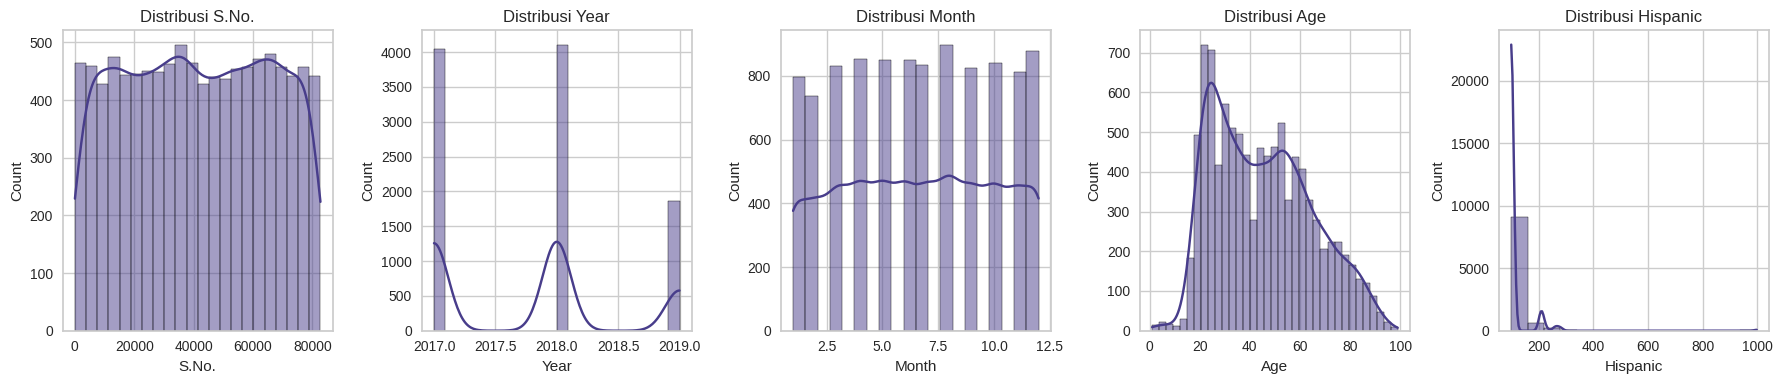


 Matriks Korelasi:


,S.No.,Year,Month,Age,Hispanic
S.No.,1.000000,0.920476,0.004005,0.011653,0.000495
Year,0.920476,1.000000,-0.008548,0.016726,0.018420
Month,0.004005,-0.008548,1.000000,-0.012366,-0.014704
Age,0.011653,0.016726,-0.012366,1.000000,-0.095986
Hispanic,0.000495,0.018420,-0.014704,-0.095986,1.000000


In [24]:
def analyze_distribution_and_correlation(df):

    # --- 1. Statistik Deskriptif ---
    print("Statistik Deskriptif:")
    display(df.describe())

    # --- 2. Histogram Distribusi ---
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_columns)

    print("\n Visualisasi Distribusi Variabel Numerik:")

    rows = (num_cols // 5) + 1 if num_cols % 5 != 0 else num_cols // 5
    rows = max(rows, 1)
    fig, axes = plt.subplots(rows, 5, figsize=(18, rows * 4))

    if num_cols == 1:
        axes = np.array([axes])
    if rows == 1:
        axes = axes.reshape(1, -1)

    for i, column in enumerate(numeric_columns):
        row = i // 5
        col = i % 5
        sns.histplot(data=df, x=column, kde=True, ax=axes[row, col], color='darkslateblue')
        axes[row, col].set_title(f'Distribusi {column}', fontsize=12)

    for i in range(num_cols, rows * 5):
        fig.delaxes(axes[i // 5, i % 5])

    plt.tight_layout()
    plt.show()

    # --- 3. Korelasi ---
    corr = df[numeric_columns].corr()
    print("\n Matriks Korelasi:")
    display(corr)

    return corr

# Analisis distribusi & korelasi
corr_matrix = analyze_distribution_and_correlation(df)

## 4. Visualisasi Data

Boxplot Variabel Numerik:


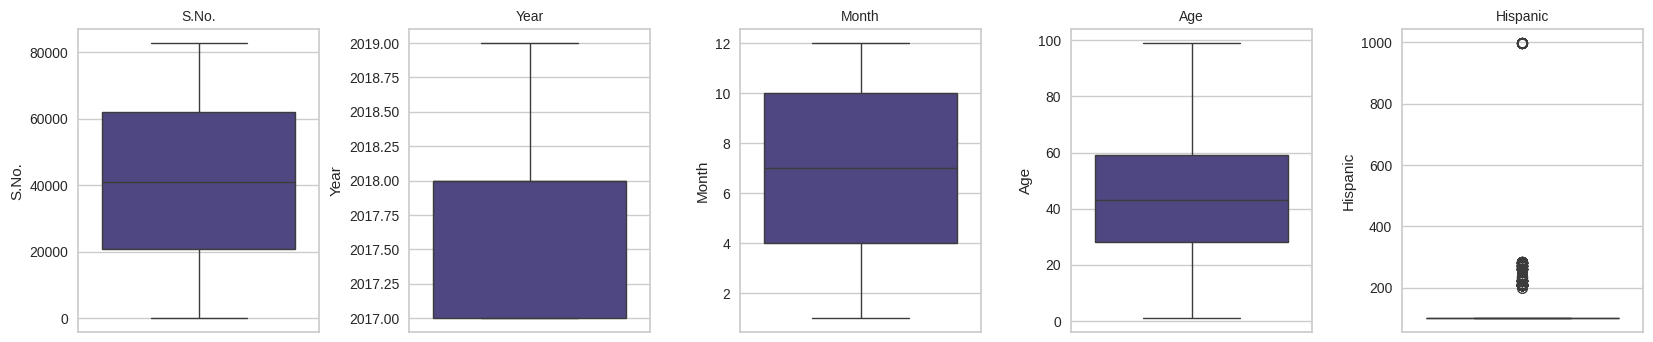

Distribusi Variabel Kategorikal:


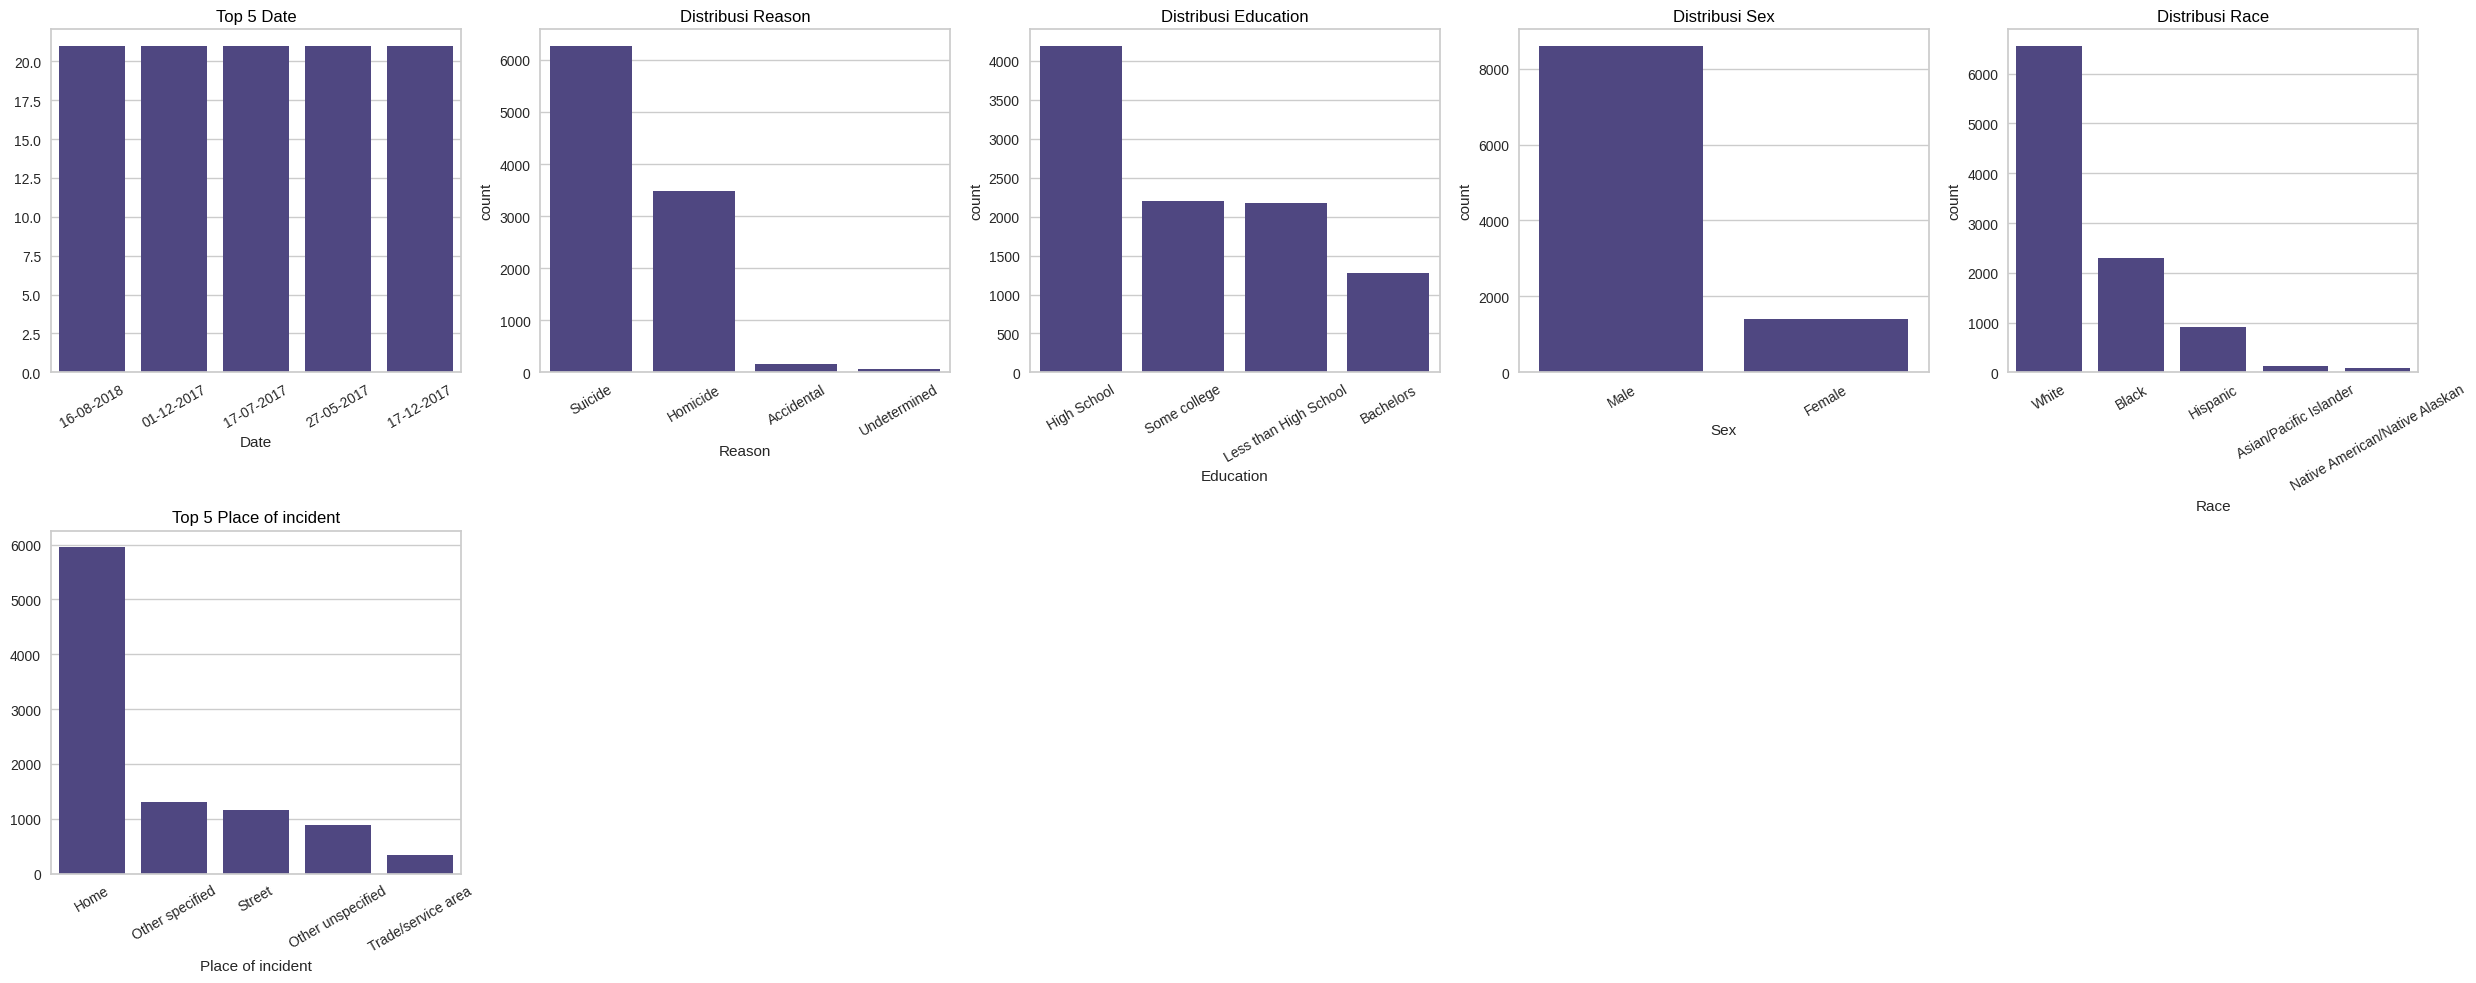

Heatmap Korelasi Variabel Numerik:


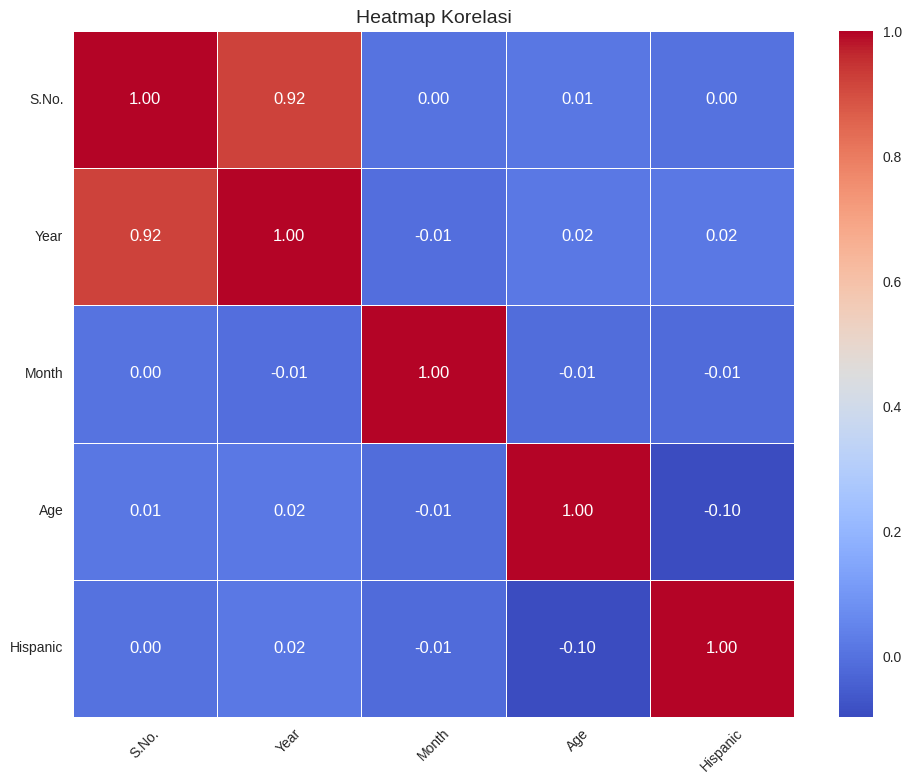

In [25]:
def visualize_data(df):

    # --- Boxplot Variabel Numerik ---
    print("Boxplot Variabel Numerik:")
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    plt.figure(figsize=(20, 10))

    for i, column in enumerate(numeric_columns):
        plt.subplot(3, 6, i + 1)
        sns.boxplot(y=column, data=df, color='darkslateblue')
        plt.title(f'{column}', fontsize=10)
        plt.xticks(rotation=60)

    plt.tight_layout()
    plt.show()

    # --- Bar Chart Variabel Kategorikal ---
    print("Distribusi Variabel Kategorikal:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    num_rows = (len(categorical_columns) + 4) // 5

    plt.figure(figsize=(25, 5 * num_rows))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, 5, i)
        value_counts = df[col].value_counts()

        if len(value_counts) > 5:
            top_categories = value_counts.head(5)
            sns.barplot(x=top_categories.index, y=top_categories.values, color='darkslateblue')
            plt.title(f'Top 5 {col}', color='black')
            plt.xticks(rotation=30)
        else:
            sns.countplot(data=df, x=col, order=value_counts.index, color='darkslateblue')
            plt.title(f'Distribusi {col}', color='black')
            plt.xticks(rotation=30)

    plt.tight_layout()
    plt.show()

    # --- Heatmap Korelasi ---
    print("Heatmap Korelasi Variabel Numerik:")
    corr = df[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap Korelasi', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Visualisasi Data
visualize_data(df)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Mengganti Kolom yang Tidak Relevan

In [4]:
def initial_preprocessing(df):
    df_clean = df.dropna()

    if df_clean.isnull().sum().sum() == 0:
        print("✅ Tidak ada missing value (NaN) yang tersisa.")
    else:
        print("⚠️ Masih terdapat missing value dalam dataset.")

    selected_columns = ['Reason', 'Sex', 'Age','Place of incident', 'Education']


    df_clean = df_clean[selected_columns]

    print("\n Info Dataset Setelah Preprocessing Awal:")
    df_clean.info()

    return df_clean
df_filtered = initial_preprocessing(df)

✅ Tidak ada missing value (NaN) yang tersisa.

 Info Dataset Setelah Preprocessing Awal:
<class 'pandas.core.frame.DataFrame'>
Index: 9692 entries, 60190 to 45658
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reason             9692 non-null   object 
 1   Sex                9692 non-null   object 
 2   Age                9692 non-null   float64
 3   Place of incident  9692 non-null   object 
 4   Education          9692 non-null   object 
dtypes: float64(1), object(4)
memory usage: 454.3+ KB


## 2. Deteksi dan Penanganan Outlier

In [5]:
def remove_outliers_IQR(df_filtered):
    df_clean = df_filtered.copy()
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        while True:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            before = df_clean.shape[0]
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
            after = df_clean.shape[0]

            if before == after:
                break
        print(f"✅ Outlier di kolom '{col}' telah dibersihkan.")

    return df_clean

# Fungsi untuk Menghapus Outlier Berdasarkan IQR
df_cleaned = remove_outliers_IQR(df_filtered)

print(f"\n Jumlah data setelah outlier dibersihkan: {df_cleaned.shape}")


✅ Outlier di kolom 'Age' telah dibersihkan.

 Jumlah data setelah outlier dibersihkan: (9692, 5)


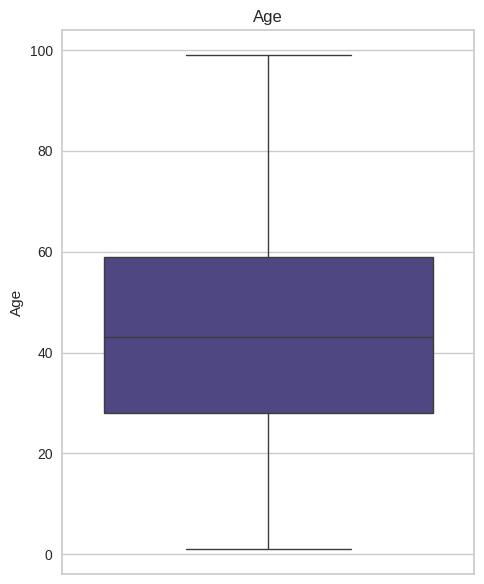

In [6]:
# Visualisasi Boxplot setelah Penanganan Outlier
plt.figure(figsize=(5, 6))

numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

for i, column in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df_cleaned[column], color='darkslateblue', showfliers=False)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()


##4. Encoding Data Kategorikal

In [8]:
def encode_non_ordinal_features(df_cleaned):

    non_ordinal_columns = ['Reason', 'Sex', 'Place of incident', 'Education']
    available_columns = df_cleaned.columns
    non_ordinal_columns_to_encode = [col for col in non_ordinal_columns if col in available_columns]

    missing_columns = set(non_ordinal_columns) - set(non_ordinal_columns_to_encode)
    if missing_columns:
        print(f"⚠️ Kolom berikut tidak ditemukan dalam dataframe: {missing_columns}")

    print(f"One-Hot Encoding untuk: {non_ordinal_columns_to_encode}")

    if not non_ordinal_columns_to_encode:
        print("⛔ Tidak ada kolom yang bisa diencode! Mengembalikan dataframe asli.")
        return df_cleaned

    # One Hot Encoding
    df_encoded_non_ordinal = pd.get_dummies(
        df_cleaned[non_ordinal_columns_to_encode],
        prefix=non_ordinal_columns_to_encode,
        prefix_sep='_'
    ).astype(int)

    df_encoded = pd.concat([df_cleaned.drop(columns=non_ordinal_columns_to_encode), df_encoded_non_ordinal], axis=1)

    print(f"✅ One-Hot Encoding selesai. Jumlah fitur sekarang: {df_encoded.shape[1]}")
    return df_encoded

df_encoded = encode_non_ordinal_features(df_cleaned)
df_encoded

One-Hot Encoding untuk: ['Reason', 'Sex', 'Place of incident', 'Education']
✅ One-Hot Encoding selesai. Jumlah fitur sekarang: 21


,Age,Reason_Accidental,Reason_Homicide,Reason_Suicide,Reason_Undetermined,Sex_Female,Sex_Male,Place of incident_Farm,Place of incident_Home,Place of incident_Industrial/construction,...,Place of incident_Other unspecified,Place of incident_Residential institution,Place of incident_School/instiution,Place of incident_Sports,Place of incident_Street,Place of incident_Trade/service area,Education_Bachelors,Education_High School,Education_Less than High School,Education_Some college
60190,60.0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
64369,52.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
79172,37.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
69337,74.0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
33854,28.0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71023,73.0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
55736,39.0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
37809,60.0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
52844,53.0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


##5. Normalisasi Fitur

In [10]:
def normalize_features(df_encoded):

    numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
    print(f"Kolom numerik yang akan dinormalisasi: {numeric_cols}")

    scaler = MinMaxScaler()

    df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

    print("✅ Normalisasi selesai. Contoh hasil:")
    print(df_encoded[numeric_cols].head())

    return df_encoded

df_normalized = normalize_features(df_encoded)

Kolom numerik yang akan dinormalisasi: ['Age', 'Reason_Accidental', 'Reason_Homicide', 'Reason_Suicide', 'Reason_Undetermined', 'Sex_Female', 'Sex_Male', 'Place of incident_Farm', 'Place of incident_Home', 'Place of incident_Industrial/construction', 'Place of incident_Other specified', 'Place of incident_Other unspecified', 'Place of incident_Residential institution', 'Place of incident_School/instiution', 'Place of incident_Sports', 'Place of incident_Street', 'Place of incident_Trade/service area', 'Education_Bachelors', 'Education_High School', 'Education_Less than High School', 'Education_Some college']
✅ Normalisasi selesai. Contoh hasil:
            Age  Reason_Accidental  Reason_Homicide  Reason_Suicide  \
60190  0.602041                0.0              0.0             1.0   
64369  0.520408                0.0              0.0             1.0   
79172  0.367347                0.0              1.0             0.0   
69337  0.744898                0.0              1.0            

In [26]:
df_normalized

,Age,Reason,Education,Sex,Place of incident
0,60.0,Suicide,High School,Female,Home
1,52.0,Suicide,Some college,Male,Other specified
2,37.0,Homicide,Some college,Male,Street
3,74.0,Homicide,High School,Male,Other unspecified
4,28.0,Homicide,Some college,Male,Other unspecified
...,...,...,...,...,...
9687,73.0,Suicide,Some college,Male,Home
9688,39.0,Suicide,Less than High School,Male,Home
9689,60.0,Suicide,Bachelors,Male,Home
9690,53.0,Suicide,Less than High School,Male,Home


In [11]:
# Menyimpan Final Data Hasil Prepocessing

print(f"✅ Final DataFrame Shape: {df_normalized.shape}")
display(df_normalized.head())

df_normalized.to_csv("preprocessed_data.csv", index=False)
print("Data berhasil disimpan sebagai 'preprocessed_data.csv'")

✅ Final DataFrame Shape: (9692, 21)


,Age,Reason_Accidental,Reason_Homicide,Reason_Suicide,Reason_Undetermined,Sex_Female,Sex_Male,Place of incident_Farm,Place of incident_Home,Place of incident_Industrial/construction,...,Place of incident_Other unspecified,Place of incident_Residential institution,Place of incident_School/instiution,Place of incident_Sports,Place of incident_Street,Place of incident_Trade/service area,Education_Bachelors,Education_High School,Education_Less than High School,Education_Some college
60190,0.602041,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
64369,0.520408,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79172,0.367347,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
69337,0.744898,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33854,0.275510,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Data berhasil disimpan sebagai 'preprocessed_data.csv'


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [12]:
def evaluate_kmeans_silhouette(df_normalized, k_range=range(2, 7), random_state=42):
    best_k = None
    best_score = -1
    best_labels = None
    best_df = None

    results = []

    print("Evaluating KMeans for k = 2 to 6 ...")
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=50, random_state=random_state)
        labels = kmeans.fit_predict(df_normalized)
        sil_score = silhouette_score(df_normalized, labels)

        results.append({'k': k, 'Silhouette Score': sil_score})
        print(f"✅ k = {k}, Silhouette Score = {sil_score:.4f}")

        if sil_score > best_score:
            best_k = k
            best_score = sil_score
            best_labels = labels
            best_df = df_normalized.copy()
            best_df['KMeans_Cluster'] = labels

    results_df = pd.DataFrame(results).sort_values(by='Silhouette Score', ascending=False)

    # Tampilkan hasil evaluasi
    print("\n Hasil Evaluasi KMeans:")
    display(results_df)

    # Tampilkan jumlah data dalam cluster terbaik
    print(f"\n K terbaik: {best_k} dengan Silhouette Score: {best_score:.4f}")

    return best_k, best_score, best_df

# Membangun Model Clustering
best_k, best_score, df_best = evaluate_kmeans_silhouette(df_normalized)


Evaluating KMeans for k = 2 to 6 ...
✅ k = 2, Silhouette Score = 0.2773
✅ k = 3, Silhouette Score = 0.2454
✅ k = 4, Silhouette Score = 0.2678
✅ k = 5, Silhouette Score = 0.2880
✅ k = 6, Silhouette Score = 0.3432

 Hasil Evaluasi KMeans:


,k,Silhouette Score
4,6,0.343214
3,5,0.287964
0,2,0.277349
2,4,0.267840
1,3,0.245352



 K terbaik: 6 dengan Silhouette Score: 0.3432


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Running KMeans for k = 2 to 10 ...
✅ k = 2, WSS = 16887.3559
✅ k = 3, WSS = 13016.7429
✅ k = 4, WSS = 11506.3574
✅ k = 5, WSS = 10659.5242
✅ k = 6, WSS = 9928.4040
✅ k = 7, WSS = 8997.6736
✅ k = 8, WSS = 8609.1855
✅ k = 9, WSS = 7664.5101
✅ k = 10, WSS = 7170.0472


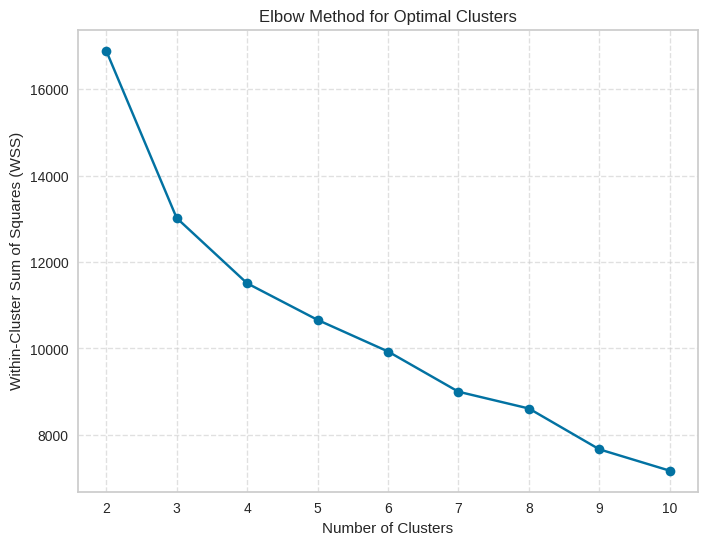

In [13]:
def elbow_method(df_normalized, max_k=10, random_state=42):
    wss_values = []
    cluster_range = range(2, max_k + 1)

    print(f"Running KMeans for k = 2 to {max_k} ...")
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df_normalized)
        wss_values.append(kmeans.inertia_)  # Inertia = WSS
        print(f"✅ k = {k}, WSS = {kmeans.inertia_:.4f}")

    # Plot hasil Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, wss_values, marker='o', linestyle='-')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WSS)')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Elbow Method untuk Menentukan Jumlah Cluster Optimal
elbow_method(df_normalized, max_k=10)


#### 🔍 Interpretasi Elbow Method untuk Menentukan Jumlah Optimal Cluster (k):

Karena nilai WSS masih cukup besar meskipun jumlah cluster ditambah dan visualisasi elbow method tidak dapat menunjukkan hasil k optimal, maka hal ini mengindikasikan adanya **dimensi data yang kurang relevan atau redundan**. Oleh karena itu, diperlukan **feature selection atau reduksi dimensi** seperti **PCA** untuk meningkatkan kualitas clustering dan memperjelas pemisahan antar cluster.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

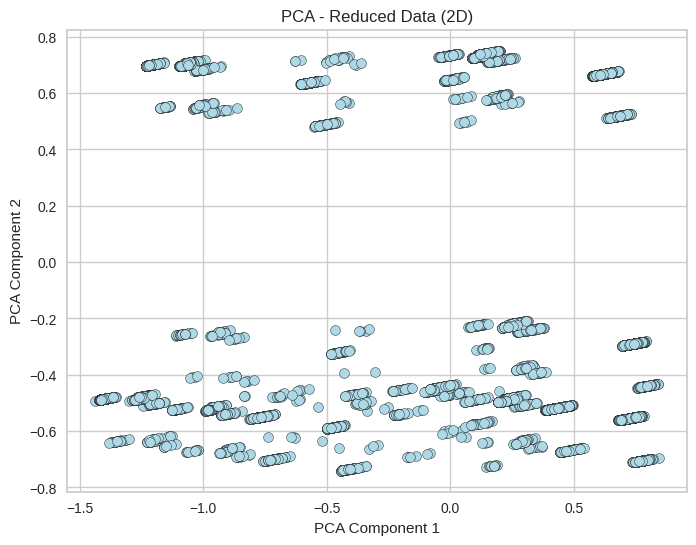

In [14]:
def reduce_dimension_pca(df_normalized, n_components=2):

    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(df_normalized)

    # Visualisasi hasil PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c='lightblue', edgecolor='k', s=50)
    plt.title("PCA - Reduced Data (2D)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

    return pca_data

pca_data = reduce_dimension_pca(df_normalized, n_components=2)

Running KMeans for k = 1 to 10 ...
✅ k = 1, WSS = 8559.9022
✅ k = 2, WSS = 5642.8453
✅ k = 3, WSS = 1992.2513
✅ k = 4, WSS = 838.1238
✅ k = 5, WSS = 638.5371
✅ k = 6, WSS = 528.4710
✅ k = 7, WSS = 493.3227
✅ k = 8, WSS = 211.7499
✅ k = 9, WSS = 176.9671
✅ k = 10, WSS = 129.5416


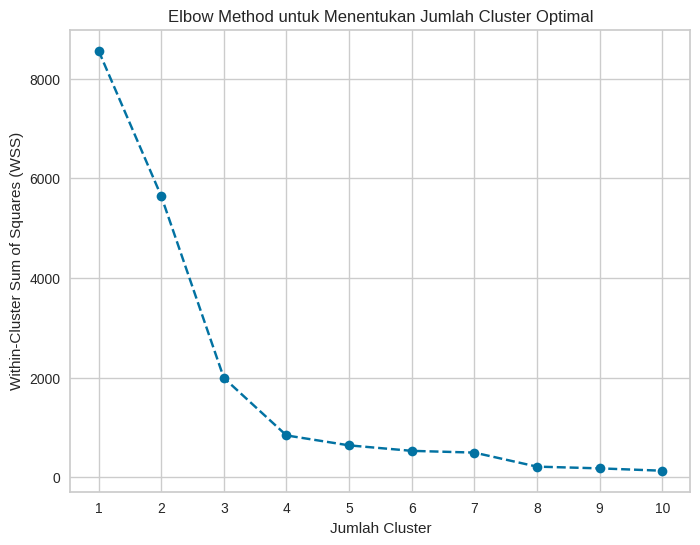

In [15]:
def elbow_method_pca(pca_data, max_clusters=10, random_state=42):
    wss = []
    cluster_range = range(1, max_clusters + 1)

    print(f"Running KMeans for k = 1 to {max_clusters} ...")
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(pca_data)
        wss.append(kmeans.inertia_)
        print(f"✅ k = {n_clusters}, WSS = {kmeans.inertia_:.4f}")

    # Visualisasi Elbow Method Hasil PCA
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, wss, marker='o', color='b', linestyle='--')
    plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Within-Cluster Sum of Squares (WSS)')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()

elbow_method_pca(pca_data, max_clusters=10)

In [16]:
def kmeans_pca_clustering(pca_data, n_clusters=4, random_state=42):

    print(f"Applying KMeans with k = {n_clusters} ...")

    #Menerapkan Algoritma K-Means pada Data Hasil PCA
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(pca_data)

    sil_score = silhouette_score(pca_data, cluster_labels)
    print(f"✅ Silhouette Score untuk data yang direduksi dengan PCA: {sil_score:.4f}")

    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    cluster_counts_df = pd.DataFrame({'Cluster': cluster_counts.index, 'Jumlah Data': cluster_counts.values})

    print("\n Distribusi Data dalam Tiap Cluster:")
    print(cluster_counts_df.to_string(index=False))

    return cluster_labels, sil_score, cluster_counts_df

cluster_labels, sil_score, cluster_counts_df = kmeans_pca_clustering(pca_data, n_clusters=4)

Applying KMeans with k = 4 ...
✅ Silhouette Score untuk data yang direduksi dengan PCA: 0.7022

 Distribusi Data dalam Tiap Cluster:
 Cluster  Jumlah Data
       0         1452
       1         3656
       2         2666
       3         1918


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

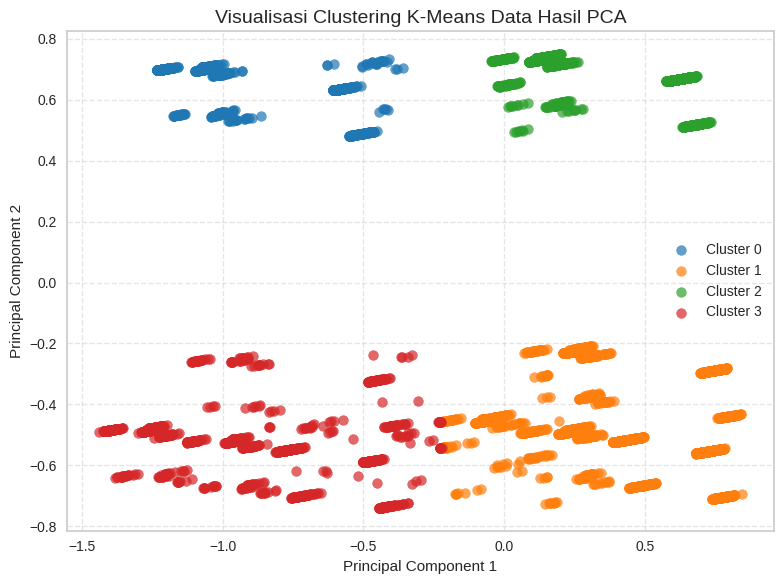

In [17]:
def visualize_clusters(pca_data, cluster_labels, n_clusters=4):
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette("tab10", n_colors=n_clusters)

    for cluster in range(n_clusters):
        plt.scatter(
            pca_data[cluster_labels == cluster, 0],
            pca_data[cluster_labels == cluster, 1],
            s=50,
            label=f'Cluster {cluster}',
            alpha=0.7,
            color=palette[cluster]
        )

    plt.title("Visualisasi Clustering K-Means Data Hasil PCA", fontsize=14)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

visualize_clusters(pca_data, cluster_labels, n_clusters=4)

### Interpretasi:

Visualisasi hasil clustering K-Means setelah reduksi dimensi menggunakan PCA menunjukkan bahwa data terbagi jelas menjadi empat cluster yang terpisah dengan baik. Setiap cluster menempati ruang berbeda pada kombinasi Principal Component 1 dan 2, yang menandakan adanya pola dan karakteristik unik dari tiap kelompok. Pemisahan ini menunjukkan bahwa metode clustering berhasil mengelompokkan data secara efektif berdasarkan fitur-fitur yang ada.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [18]:
# 1️⃣ Load Data Preprocessed dan Data Asli
df_original = df_cleaned
df_normalized = pd.read_csv("preprocessed_data.csv")

# 2️⃣ Inisialisasi Encoder dan Scaler
scaler = MinMaxScaler()
label_encoders = {}

# 3️⃣ Inverse Transform Normalisasi (MinMaxScaler)
numeric_cols = df_original.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col in df_normalized.columns]

scaler.fit(df_original[numeric_cols])
df_normalized[numeric_cols] = scaler.inverse_transform(df_normalized[numeric_cols])

# 4️⃣ Inverse Transform One-Hot Encoding untuk semua kolom kategorikal yang telah diencode

original_categorical_cols = ['Reason', 'Education', 'Sex', 'Place of incident']

for col in original_categorical_cols:
    ohe_cols = [c for c in df_normalized.columns if c.startswith(col + "_")]
    if ohe_cols:
        df_normalized[col] = df_normalized[ohe_cols].idxmax(axis=1).str.replace(col + "_", "")
        df_normalized.drop(columns=ohe_cols, inplace=True)

# 5️⃣ Simpan Data yang Sudah Di-Inverse
df_recovered = df_normalized.copy()
df_recovered.to_csv("data_recovered.csv", index=False)
print("✅ Data telah dikembalikan ke bentuk semula dan disimpan sebagai 'data_recovered.csv'")

# 6️⃣ Tampilkan Data
df_recovered['cluster'] = cluster_labels
print("\n Data Sesudah Inverse Transform:")
print(df_recovered.head())


✅ Data telah dikembalikan ke bentuk semula dan disimpan sebagai 'data_recovered.csv'

 Data Sesudah Inverse Transform:
    Age    Reason     Education     Sex  Place of incident  cluster
0  60.0   Suicide   High School  Female               Home        2
1  52.0   Suicide  Some college    Male    Other specified        1
2  37.0  Homicide  Some college    Male             Street        3
3  74.0  Homicide   High School    Male  Other unspecified        0
4  28.0  Homicide  Some college    Male  Other unspecified        3


In [19]:
# Melihat ringkasan kolom cluster
print(df_recovered['cluster'].value_counts(dropna=False))

# Mengecek apakah ada nilai NaN pada kolom cluster
if df_recovered['cluster'].isna().sum() > 0:
    print(f"⚠️ Ada {df_recovered['cluster'].isna().sum()} nilai NaN dalam kolom 'cluster'.")
else:
    print("✅ Tidak ada nilai NaN dalam kolom 'cluster'.")

cluster
1    3656
2    2666
3    1918
0    1452
Name: count, dtype: int64
✅ Tidak ada nilai NaN dalam kolom 'cluster'.


In [20]:
# Membuat Ringkasan Hasil Clustering
from tabulate import tabulate

clusters_summary = []

# 1️⃣ Daftar Kolom Numerik dan Kategorik
numeric_cols_summary = {
    'Age': '🧑‍🦱 Usia',
}

cat_cols_summary = {
    'Sex': '🚹 Jenis Kelamin',
    'Education': '🎓 Pendidikan',
    'Reason': '🔫 Motif Tindakan',
    'Place of incident': '📍 Tempat Kejadian',
}

# 2️⃣ Looping Setiap Cluster
for cluster_id in sorted(df_recovered['cluster'].unique()):
    cluster_data = df_recovered[df_recovered['cluster'] == cluster_id]

    cluster_dict = {
        'Cluster': int(cluster_id),
        'Total Data': len(cluster_data),
    }

    # --- Rata-rata Kolom Numerik ---
    for col, col_name in numeric_cols_summary.items():
        cluster_dict[col_name] = f"{cluster_data[col].mean():,.2f}"

    # --- Modus Kolom Kategorik ---
    for col, col_name in cat_cols_summary.items():
        cluster_dict[col_name] = cluster_data[col].mode()[0]

    clusters_summary.append(cluster_dict)

# 3️⃣ Urutkan Berdasarkan Jumlah Data
clusters_summary_sorted = sorted(clusters_summary, key=lambda x: x['Total Data'], reverse=True)

# 4️⃣ Menampilkan Output
print("\n \033[30m\033[4mRingkasan Karakteristik Setiap Cluster\033[0m ")

for c in clusters_summary_sorted:
    print(f"\n🔹 \033[30m\033[1mCluster {c['Cluster']}\033[0m  (\033[30m{c['Total Data']} Data\033[0m)")

    for col_name in numeric_cols_summary.values():
        print(f"     - {col_name:<40}: \033[30m{c[col_name]}\033[0m")

    for col_name in cat_cols_summary.values():
        print(f"     - {col_name:<40}: \033[30m{c[col_name]}\033[0m")



 Ringkasan Karakteristik Setiap Cluster 

🔹 Cluster 1  (3656 Data)
     - 🧑‍🦱 Usia                                : 50.97
     - 🚹 Jenis Kelamin                         : Male
     - 🎓 Pendidikan                            : Some college
     - 🔫 Motif Tindakan                        : Suicide
     - 📍 Tempat Kejadian                       : Home

🔹 Cluster 2  (2666 Data)
     - 🧑‍🦱 Usia                                : 51.68
     - 🚹 Jenis Kelamin                         : Male
     - 🎓 Pendidikan                            : High School
     - 🔫 Motif Tindakan                        : Suicide
     - 📍 Tempat Kejadian                       : Home

🔹 Cluster 3  (1918 Data)
     - 🧑‍🦱 Usia                                : 32.59
     - 🚹 Jenis Kelamin                         : Male
     - 🎓 Pendidikan                            : Less than High School
     - 🔫 Motif Tindakan                        : Homicide
     - 📍 Tempat Kejadian                       : Home

🔹 Cluster 0  (1452 Data)

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

### **Cluster 1 - Pria paruh baya pernah kuliah menghilangkan nyawanya di rumah (3656 Data)**

🧓 Rata-rata Usia: 50.97 tahun

🚹 Jenis Kelamin: Male

🎓 Pendidikan : Some college

🔫 Motif Tindakan: Suicide

📍 Tempat Kejadian: Home

📝 **Analisis:**

Cluster ini didominasi oleh individu berusia sekitar 51 tahun, berjenis kelamin laki-laki, dan pernah kuliah tetapi belum lulus. Motif utama tindakan adalah bunuh diri yang terjadi di rumah. Karakteristik ini menunjukkan bahwa individu dalam cluster ini berada pada usia paruh baya, memiliki latar belakang pendidikan menengah-ke-atas, dan cenderung melakukan tindakan bunuh diri di lingkungan pribadi. Faktor usia dan pendidikan mungkin berperan dalam tekanan psikologis atau beban hidup tertentu.



### **Cluster 2 - Pria paruh baya lulusan SMA menghilangkan nyawanya di rumah  (2666 Data)**

🧓 Rata-rata Usia: 51.68 tahun

🚹 Jenis Kelamin: Male

🎓 Pendidikan : High School

🔫 Motif Tindakan: Suicide

📍 Tempat Kejadian: Home

**📝Analisis:**

Serupa dengan Cluster 1, cluster ini juga didominasi laki-laki dengan usia rata-rata sedikit lebih tinggi, yaitu 51.68 tahun. Namun, tingkat pendidikan lebih rendah, yaitu lulusan SMA. Motif tindakan tetap bunuh diri dan tempat kejadian juga di rumah. Hal ini mengindikasikan bahwa bunuh diri banyak terjadi pada kelompok usia tua dengan latar pendidikan menengah, yang kemungkinan menghadapi masalah sosial atau kesehatan yang mempengaruhi kondisi mental.



### **Cluster 3 - Pria muda berpendidikan rendah dan melakukan pembunuhan di rumah  (1918 Data)**:

🧓 Rata-rata Usia: 32.59 tahun

🚹 Jenis Kelamin: Male

🎓 Pendidikan : Less than High School

🔫 Motif Tindakan: Homicide

📍 Tempat Kejadian: Home

**📝Analisis:**

Cluster ini berisi individu yang jauh lebih muda dibandingkan dua cluster sebelumnya, dengan usia rata-rata 32.59 tahun dan berjenis kelamin laki-laki. Tingkat pendidikan relatif rendah, yaitu kurang dari SMA. Motif utama tindakan adalah pembunuhan, dan tempat kejadian tetap di rumah. Analisis ini menunjukkan bahwa tindak pembunuhan lebih sering dilakukan oleh individu muda dengan pendidikan rendah, yang mungkin terkait dengan faktor lingkungan, ekonomi, atau konflik dalam rumah tangga.

### **Cluster 0 - Pria muda lulusan SMA dan melakukan pembunuhan di rumah (1452 Data)**:

🧓 Rata-rata Usia: 35.17 tahun

🚹 Jenis Kelamin: Male

🎓 Pendidikan : High School

🔫 Motif Tindakan: Homicide

📍 Tempat Kejadian: Home

**📝Analisis:**

Cluster ini mirip dengan Cluster 3 dari segi motif tindakan, yaitu pembunuhan, namun sedikit lebih tua dengan usia rata-rata 35.17 tahun. Latar pendidikan adalah lulusan SMA, lebih tinggi dari Cluster 3 dengan tempat kejadian yang tetap di rumah. Hal ini mengindikasikan bahwa pembunuhan juga terjadi di kelompok usia muda-dewasa dengan pendidikan menengah, yang mungkin memiliki tingkat kontrol diri lebih rendah atau terlibat dalam konflik rumah tangga.

## Kesimpulan

**🎯 Hasil Clustering Sesuai Ekspektasi dan Logika Bisnis**

Hasil clustering mencerminkan pola perilaku yang wajar dan konsisten dengan fenomena sosial terkait kasus senjata api. Misalnya, pria paruh baya dengan latar belakang pendidikan menengah hingga perguruan tinggi yang melakukan bunuh diri di rumah (Cluster 1 dan 2) adalah pola yang sering muncul dalam kajian psikologi dan data kriminal. Di sisi lain, pria muda dengan pendidikan rendah yang terlibat dalam pembunuhan di rumah (Cluster 0 dan 3) juga mencerminkan dinamika kekerasan domestik atau konflik personal. Perbedaan motif dan karakteristik antar cluster memberikan pemahaman yang lebih tajam terkait profil risiko tiap kelompok.



📊 **Pola yang Bisa Dimanfaatkan**

1. Segmentasi Risiko: Pola yang ditemukan memungkinkan segmentasi kelompok berisiko berdasarkan usia, jenis kelamin, pendidikan, dan tempat kejadian untuk mendukung intervensi dan kampanye pencegahan yang lebih terarah.

2. Fokus Pencegahan: Pencegahan bunuh diri bisa difokuskan pada pria paruh baya berpendidikan menengah yang rentan mengalami tekanan, sementara pencegahan kekerasan dapat ditujukan kepada pria muda berpendidikan rendah yang lebih rentan terlibat konflik fisik.

3. Kebijakan Penegakan Hukum dan Kesehatan Mental: Pemerintah atau lembaga sosial dapat menggunakan temuan ini untuk merancang kebijakan kesehatan mental dan pengendalian senjata berbasis data, menyesuaikan pendekatan dengan karakteristik sosial, usia, dan pendidikan dari tiap kelompok risiko.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [21]:
df_recovered['cluster'] = cluster_labels
df_recovered.to_csv('gun_cluster.csv', index=False)
df_recovered.head()

,Age,Reason,Education,Sex,Place of incident,cluster
0,60.0,Suicide,High School,Female,Home,2
1,52.0,Suicide,Some college,Male,Other specified,1
2,37.0,Homicide,Some college,Male,Street,3
3,74.0,Homicide,High School,Male,Other unspecified,0
4,28.0,Homicide,Some college,Male,Other unspecified,3
